In [119]:
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from sympy.physics.quantum.dagger import Dagger
from numpy import conjugate as conj
from scipy.sparse.linalg import eigsh
from scipy.optimize import curve_fit
from statistics import mean, stdev

L'Hamiltoniana di una catena di spin 1D, con interazioni a primi vicini in campo trasversale risulta:

$$
H= -J\sum_{i}^{}\sigma^{z}_{i+1}\sigma^{z}_{i}-h\sum_{i}^{}\sigma^{z}_{i}-g\sum_{i}^{}\sigma^{x}_{i}
$$

Dove gli operatori di pauli sono definiti nella seguente maniera:
$$
\sigma^{z}=\begin{pmatrix}
1 & 0\\ 
0 & -1
\end{pmatrix} \ \
$$

$$
\sigma^{x} = \begin{pmatrix}
0 & 1\\ 
1 & 0
\end{pmatrix}
$$

Come prima cosa devo riuscirmi a costruire la matrice corrispondente all'Hamiltoniana nella base computazionale.


In [117]:
import numpy as np
from scipy.sparse import csr_matrix, kron, eye

beta = 1/8
gamma = 7/4
alpha = 0
d = 15
ni = 1

def sigma_z():
    sigmaz = np.array([[1, 0], [0, -1]])
    return csr_matrix(sigmaz)

def sigma_x():
    sigmax = np.array([[0, 1], [1, 0]])
    return csr_matrix(sigmax)

def sigma_y():
    sigmay = np.array([[0, -1j], [1j, 0]])
    return csr_matrix(sigmay)

def longitudinal_field_operator(h, N):    
    Sz = csr_matrix((2**N, 2**N))
    for k in range(N):
        Sz += csr_matrix(kron(kron(eye(2**(k)), sigma_z()), eye(2**(N-k-1))))
    return csr_matrix(h * Sz)

def transverse_field_operator(g, N):
    Sx = csr_matrix((2**N, 2**N))
    for k in range(N):
        Sx += csr_matrix(kron(kron(eye(2**k), sigma_x()), eye(2**(N-k-1))))
    return csr_matrix(g * Sx)
        
def y_field_operator(r, N):    
    Sy = csr_matrix((2**N, 2**N))
    for k in range(N):
        Sy += csr_matrix(kron(kron(eye(2**k), sigma_y()), eye(2**(N-k-1))))
    return r * Sy

def coupling_z_operator(J, N):
    Jz = csr_matrix((2**N, 2**N))
    coupling_operator = csr_matrix(kron(sigma_z(), sigma_z()))
    for k in range(N-1):
        Jz += csr_matrix(kron(kron(eye(2**k), coupling_operator), eye(2**(N-k-2))))
    Jz += csr_matrix(kron(sigma_z(), kron(eye(2**(N-2)), sigma_z())))
    return J * Jz

def Ham_operator(J, h, g, N):
    Ham = -coupling_z_operator(J, N) - longitudinal_field_operator(h, N) - transverse_field_operator(g, N)
    return csr_matrix(Ham)

def Magnetizzazione_z(psi, N):
    rho = csr_matrix(np.outer(psi, psi.conj()))
    M = csr_matrix(kron(longitudinal_field_operator(1, N), rho))
    print(M)
    m=csr_matrix(M).trace()
    return m / N

def Magnetizzazione_x(psi, N):
    rho = csr_matrix(np.outer(psi.conj(), psi))
    M = csr_matrix(kron(transverse_field_operator(1, N), rho))
    m=M.trace()
    return m / N


######################################################################################

FUNZIONI FINITE

######################################################################################

#### GAP energetico primo eccitato-ground state e Spettro

In [3]:
h=0
J=1
delta=[]
spettro=[]

In [5]:
N=12
A=Ham_operator(J,h,1,N)
print("A ok")
gss,v=eigsh(A,k=2**N-1)

A ok


In [9]:
gss

array([-15.32259515, -15.19150823, -14.27838561, ...,  14.27838561,
        15.19150823,  15.32259515])

In [10]:
gaps=[]
for i in range (0, len(gss)-1):
    gaps.append(gss[i+1]-gss[i])


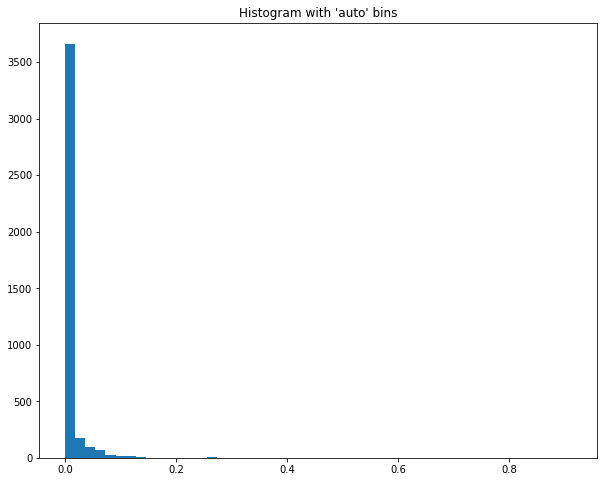

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
_ = plt.hist(gaps, bins=50)  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")
plt.show()

In [22]:
dim=5

In [27]:
Ham_operator(1,1,1,2)

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [20]:
eigsh(Ham_operator(1,1,1,2),k=3)[0]

array([-4.34017297,  2.        ,  2.96238861])

In [32]:
g_vector=np.linspace(0,2,30)
grounds=[]
Delta_0=[]
Delta_1=[]
for i in range (0,dim):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_0=[]
    delta_1=[]
    for j in range(0,len(g_vector)):
        A=Ham_operator(J,h,g_vector[j],N)
        grounds_i.append(eigsh(A,1,which='SA'))
        gss=eigsh(A,3,which='SA')
        print(gss[0])
        delta_0.append(gss[0][1]-gss[0][0])
        delta_1.append(gss[0][2]-gss[0][0])
    grounds.append(grounds_i)
    Delta_0.append(delta_0)
    Delta_1.append(delta_1)

0
[-6. -6. -2.]
[-6.00713651 -6.00713646 -2.24351174]
[-6.02857323 -6.02856987 -2.49559396]
[-6.0644019  -6.06436395 -2.75514013]
[-6.11480854 -6.11459822 -3.02083307]
[-6.18011963 -6.17933181 -3.2911138 ]
[-6.26085912 -6.25856079 -3.56415283]
[-6.35780613 -6.35217608 -3.837827  ]
[-6.47203559 -6.45992992 -4.10971373]
[-6.60491359 -6.58141726 -4.37712678]
[-6.75800885 -6.71607564 -4.6372299 ]
[-6.93288521 -6.86320281 -4.88726248]
[-7.13077719 -7.02198779 -5.12487561]
[-7.35222601 -7.1915493  -5.34850205]
[-7.59682364 -7.37097483 -5.55761349]
[-7.86319632 -7.55935547 -5.75273521]
[-8.14923655 -7.75581357 -5.93520992]
[-8.45246284 -7.9595223  -6.1115067 ]
[-8.77035656 -8.16971759 -6.37243825]
[-9.10058962 -8.3857038  -6.63434056]
[-9.44113403 -8.6068547  -6.8971264 ]
[-9.79028643 -8.83261118 -7.16071815]
[-10.14664531  -9.06247706  -7.42504663]
[-10.50906903  -9.29601373  -7.69005   ]
[-10.87663045  -9.53283443  -7.95567286]
[-11.2485755   -9.7725986   -8.22186551]
[-11.62428816 -10.0150

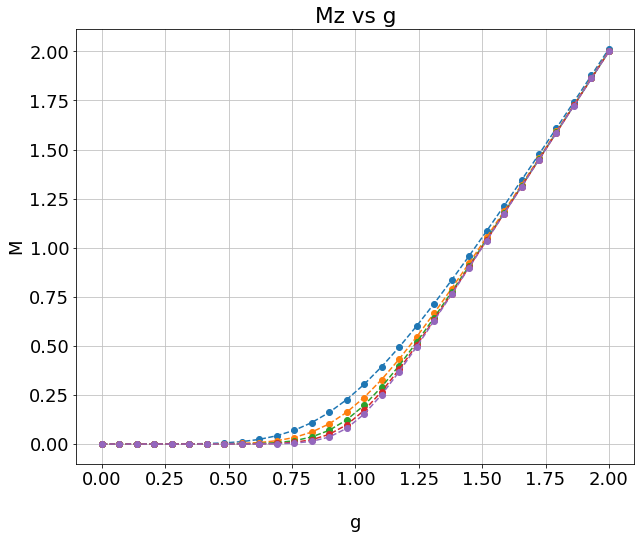

In [33]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (0,len(Delta_0)):
    plt.plot(g_vector, Delta_0[i],label='N'+str(i),linestyle='--',marker='o')

plt.show()

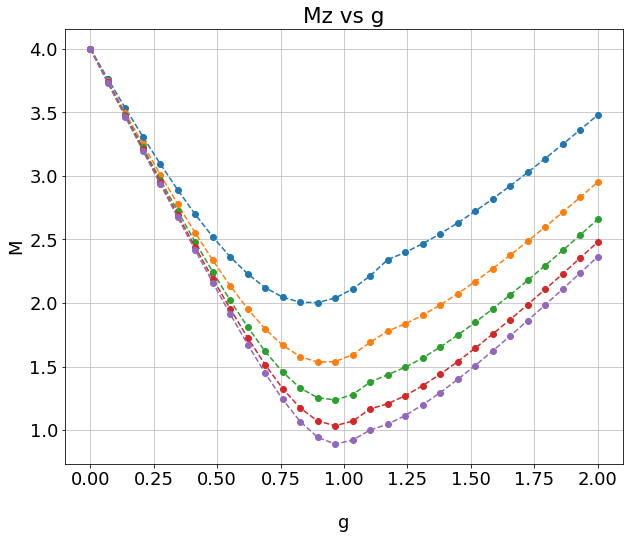

In [34]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range(0,len(Delta_1)):
    plt.plot(g_vector, Delta_1[i],label='N=6',linestyle='--',marker='o')

plt.show()

In [58]:
Ns=[4,6,8,10,12,14]
deltas=[]
for n in Ns:
    print(n)
    A=Ham_operator(1,0,1,n)
    gss=eigsh(A,2,which='SA')
    print(gss)
    deltas.append(gss[0][1]-gss[0][0])

4
(array([-5.22625186, -4.82842712]), array([[ 5.76640741e-01, -6.53281482e-01],
       [ 1.76776695e-01, -1.35299025e-01],
       [ 1.76776695e-01, -1.35299025e-01],
       [ 1.35299025e-01, -8.32667268e-17],
       [ 1.76776695e-01, -1.35299025e-01],
       [ 7.66407412e-02,  2.08166817e-17],
       [ 1.35299025e-01,  0.00000000e+00],
       [ 1.76776695e-01,  1.35299025e-01],
       [ 1.76776695e-01, -1.35299025e-01],
       [ 1.35299025e-01,  4.16333634e-17],
       [ 7.66407412e-02, -2.77555756e-16],
       [ 1.76776695e-01,  1.35299025e-01],
       [ 1.35299025e-01,  1.11022302e-16],
       [ 1.76776695e-01,  1.35299025e-01],
       [ 1.76776695e-01,  1.35299025e-01],
       [ 5.76640741e-01,  6.53281482e-01]]))
6
(array([-7.72740661, -7.46410162]), array([[ 5.13849063e-01,  5.91506351e-01],
       [ 1.47937711e-01,  1.44337567e-01],
       [ 1.47937711e-01,  1.44337567e-01],
       [ 9.42930599e-02,  5.28312164e-02],
       [ 1.47937711e-01,  1.44337567e-01],
       [ 4.91933849

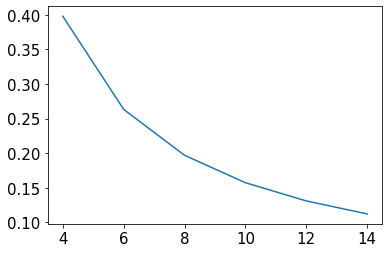

In [59]:
plt.plot(Ns,deltas)

In [73]:
def scaling_x(x, a, b, c):
    return a * np.exp(-x*b) + c
params, cov = curve_fit(scaling_x,Ns,deltas,p0=[0.1,0.01,0])

# Calcolare gli errori sui parametri
errors = np.sqrt(np.diag(cov))

# Calcolare il chi-quadrato
residuals = np.array(deltas) - scaling_x(np.array(deltas), *params)
chisq = ((residuals)**2).sum()

print(chisq)
print(params)

3.4771939819267725
[0.91543295 0.280398   0.0980336 ]


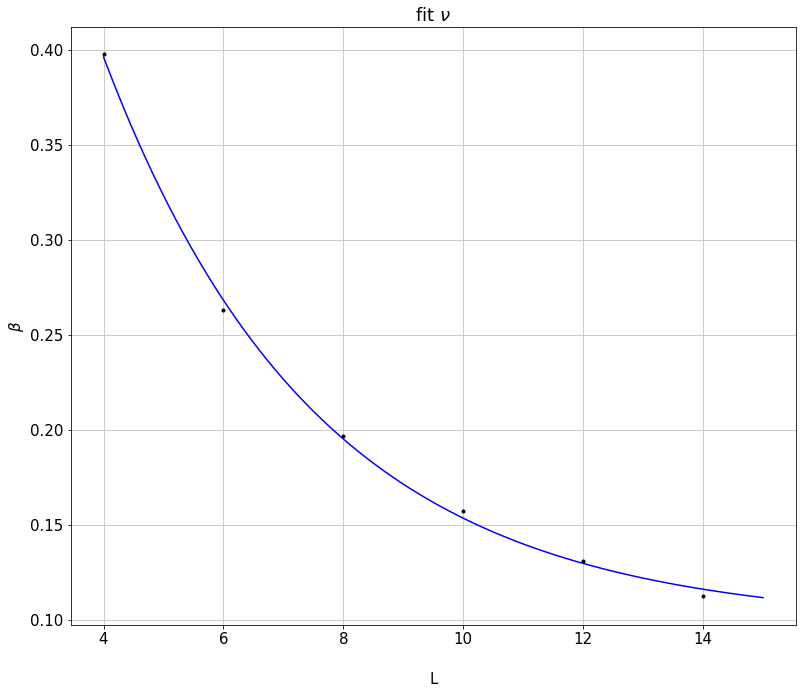

In [75]:
n=np.linspace(min(Ns),max(Ns)+1,10000)
y=scaling_x(n,*params)
plt.figure(figsize=(13, 11))
plt.title(r'fit $\nu$')
plt.rc('font', size = 15)
plt.xlabel('L', labelpad = 25)
plt.ylabel(r'$\beta$')
plt.grid(color = 'silver')
plt.plot(Ns, deltas, linestyle = '', color = 'black', marker = '.')
plt.plot(n, y, color = 'blue', label = 'retta di fit')

plt.show()

In [101]:
grounds=[]
for i in range (0,3):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_i=[]
    for j in range(0,len(g_vector)):
        A=Ham_operator(J,0.00001,g_vector[j],N)
        grounds_i.append(eigsh(A,1,which='SA'))
    grounds.append(grounds_i)

0
1
2


In [120]:
M_Zs=[]
M_Xs=[]
GS=[]
for i in range (0,3):
    m_Zs=[]
    m_Xs=[]
    m2_Zs=[]
    m2_Xs=[]
    Gs=[]
    N=i*2+6
    print(N)
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        
        m_Zs.append(Magnetizzazione_z(gs_0,N))
        #m_Xs.append(Magnetizzazione_x(gs_0,N))
        gs.append(gs)
    M_Zs.append(m_Zs)
    M_Xs.append(m_Xs)
    GS.append(Gs)

6
  (0, 0)	2.724740750448004
  (0, 1)	0.35807830298790294
  (0, 2)	0.3580783029879028
  (0, 3)	0.10269538276425672
  (0, 4)	0.35807830298790266
  (0, 5)	0.05097047462334041
  (0, 6)	0.10269538276425627
  (0, 7)	0.059225487954298564
  (0, 8)	0.35807830298790305
  (0, 9)	0.04959702459535434
  (0, 10)	0.05097047462334074
  (0, 11)	0.024603275961531813
  (0, 12)	0.10269538276425677
  (0, 13)	0.02460327596153187
  (0, 14)	0.05922548795429876
  (0, 15)	0.10150058864996797
  (0, 16)	0.3580783029879028
  (0, 17)	0.0509704746233407
  (0, 18)	0.049597024595354575
  (0, 19)	0.024603275961531845
  (0, 20)	0.0509704746233407
  (0, 21)	0.012538279847724362
  (0, 22)	0.024603275961531952
  (0, 23)	0.0503446372062606
  (0, 24)	0.10269538276425672
  :	:
  (4095, 4071)	-0.1000146162478025
  (4095, 4072)	-0.05022426497448082
  (4095, 4073)	-0.024243083084150997
  (4095, 4074)	-0.01235471896327871
  (4095, 4075)	-0.04960758984052048
  (4095, 4076)	-0.024243083084151146
  (4095, 4077)	-0.04825425361393275


AttributeError: trace not found

IndexError: list index out of range

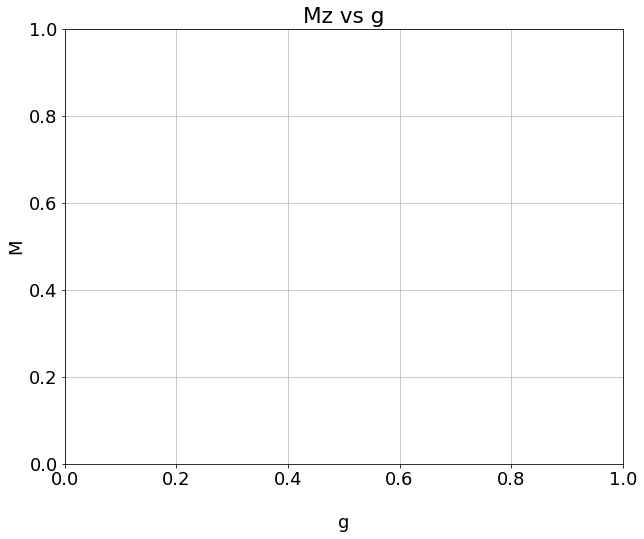

In [38]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (o,len(M_Zs)):
    plt.plot(g_vector, M_Zs[0],label='N=6',linestyle='--',marker='o')
    plt.plot(g_vector, M_Zs[1],label='N=8',linestyle='--',marker='o')
    plt.plot(g_vector, M_Zs[2],label='N=10',linestyle='--',marker='o')

plt.show()

In [ ]:
grounds=[]
for i in range (0,5):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_i=[]
    for j in range(0,len(g_vector)):
        A=Ham_operator(J,0.001,g_vector[j],N)
        grounds_i.append(eigsh(A,1),which='SA')
    grounds.append(grounds_i)

0
1
2


In [ ]:
M_Zs=[]
M_Xs=[]
GS=[]
for i in range (0,3):
    m_Zs=[]
    m_Xs=[]
    m2_Zs=[]
    m2_Xs=[]
    Gs=[]
    N=i*2+6
    print(N)
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        
        m_Zs.append(Magnetizzazione_z(gs_0,N))
        m_Xs.append(Magnetizzazione_x(gs_0,N))
        gs.append(gs)
    M_Zs.append(m_Zs)
    M_Xs.append(m_Xs)
    GS.append(Gs)

6
8
10


IndexError: list index out of range

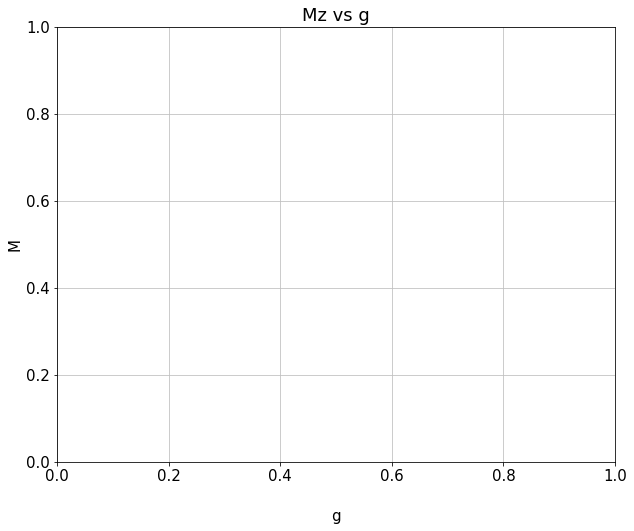

In [111]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(g_vector, M_Zs[0],label='N=6',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[1],label='N=8',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[2],label='N=10',linestyle='--',marker='o')

plt.show()

In [ ]:
grounds=[]
for i in range (0,5):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_i=[]
    for j in range(0,len(g_vector)):
        A=Ham_operator(J,0,g_vector[j],N)
        grounds_i.append(eigsh(A,1),which='SA')
    grounds.append(grounds_i)

0
1
2


In [ ]:
M_Zs=[]
M_Xs=[]
GS=[]
for i in range (0,5):
    m_Zs=[]
    m_Xs=[]
    m2_Zs=[]
    m2_Xs=[]
    Gs=[]
    N=i*2+6
    print(N)
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        
        m_Zs.append(Magnetizzazione_z(gs_0,N))
        m_Xs.append(Magnetizzazione_x(gs_0,N))
        gs.append(gs)
    M_Zs.append(m_Zs)
    M_Xs.append(m_Xs)
    GS.append(Gs)

6
8
10


IndexError: list index out of range

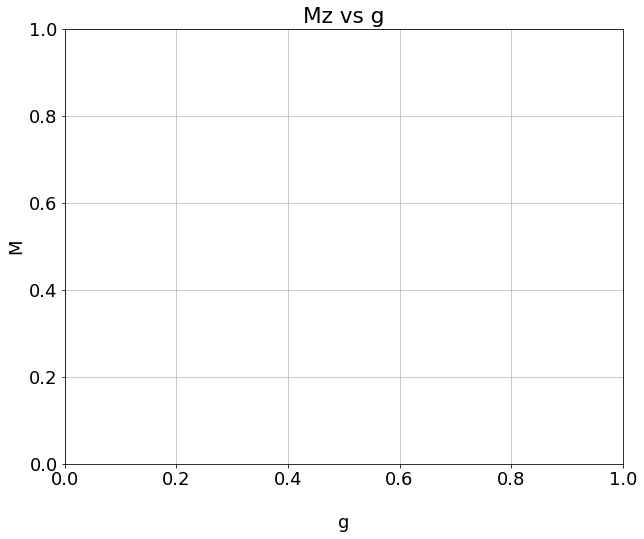

In [40]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(g_vector, M_Zs[0],label='N=6',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[1],label='N=8',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[2],label='N=10',linestyle='--',marker='o')

plt.show()

In [ ]:
def Magnetizzazione_z(psi,N):

    p=[]
    for i in range (0,len(psi)):
        p.append(np.abs(psi[i]**2))
    p=np.array(p)
    M=np.sum(np.abs(np.dot(longitudinal_field_operator(1,N),p)))
    
    return M/N

In [ ]:
M_Zs=[]
M_Xs=[]
GS=[]
for i in range (0,5):
    m_Zs=[]
    m_Xs=[]
    m2_Zs=[]
    m2_Xs=[]
    Gs=[]
    N=i*2+6
    print(N)
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        
        m_Zs.append(Magnetizzazione_z(gs_0,N))
        m_Xs.append(Magnetizzazione_x(gs_0,N))
        gs.append(gs)
    M_Zs.append(m_Zs)
    M_Xs.append(m_Xs)
    GS.append(Gs)

6
8
10


IndexError: list index out of range

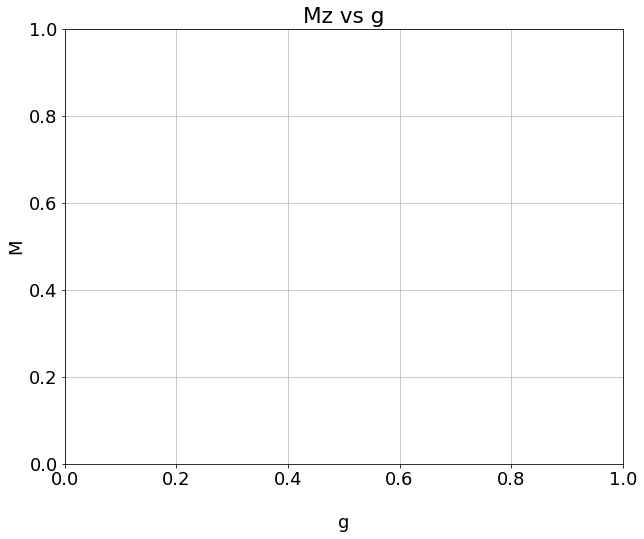

In [41]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(g_vector, M_Zs[0],label='N=6',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[1],label='N=8',linestyle='--',marker='o')
plt.plot(g_vector, M_Zs[2],label='N=10',linestyle='--',marker='o')

plt.show()

[1.         0.99940421 0.99760077 0.99453409 0.99008769 0.98405052
 0.97607576 0.96564203 0.95203808 0.93440763 0.91190229 0.88396882
 0.85070997 0.81312912 0.77303851 0.7326033  0.69377105 0.65789435
 0.62565677 0.59720734 0.57235794 0.5507523  0.53197893 0.51563461
 0.50135418 0.48882073 0.47776563 0.46796412 0.45922928 0.45140596]
[1.         0.99940423 0.99760182 0.99454571 0.99014955 0.98426952
 0.97666712 0.96694398 0.95444463 0.93814231 0.91657396 0.88798771
 0.85094454 0.80541618 0.75371346 0.70009699 0.64900108 0.60338461
 0.56434911 0.53169077 0.50459642 0.48210603 0.46333188 0.44753071
 0.43410795 0.42259741 0.41263594 0.40394043 0.39628911 0.389507  ]
[1.         0.99940423 0.99760185 0.99454623 0.99015445 0.98429685
 0.97677457 0.96727171 0.95525935 0.93982288 0.91940538 0.89157713
 0.85327221 0.80233092 0.7403783  0.67405572 0.61157717 0.55809728
 0.51474706 0.48035321 0.45309378 0.43128347 0.41358861 0.39901421
 0.38683218 0.37651027 0.36765622 0.35997749 0.35325286 0.34

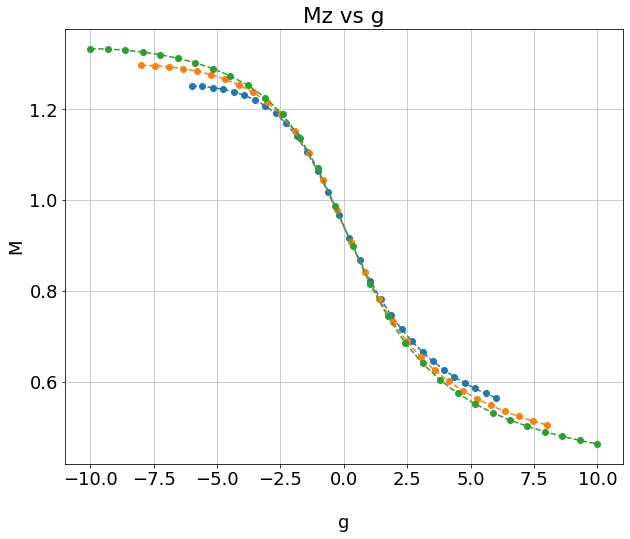

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (0,len(M_Zs)):
    N=i*2+6
    rescaled_g=N*(g_vector-np.ones(len(g_vector)))
    mss=np.array(M_Zs[i])
    print(mss)
    rescaled_m=(N**(1/8))*mss
    plt.plot(rescaled_g, rescaled_m,label='N=6',linestyle='--',marker='o')

plt.show()

IndexError: list index out of range

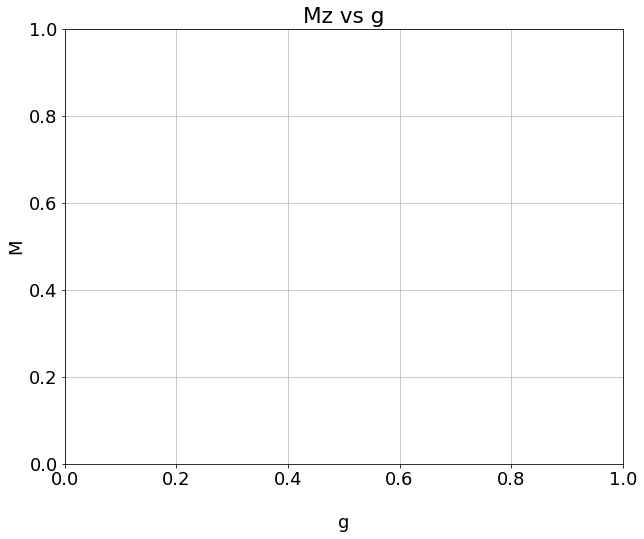

In [42]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(g_vector, M_Xs[0],label='N=6',linestyle='--',marker='o')
plt.plot(g_vector, M_Xs[1],label='N=8',linestyle='--',marker='o')
plt.plot(g_vector, M_Xs[2],label='N=10',linestyle='--',marker='o')

plt.show()

In [ ]:
h_vector=np.linspace(0,0.05,30)
grounds=[]
for i in range (0,5):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_i=[]
    for j in range(0,len(h_vector)):
        A=Ham_operator(J,h_vector[j],1,N)
        grounds_i.append(eigsh(A,1),which='SA')
    grounds.append(grounds_i)

0
1
2


In [43]:
dh=0.05/30
M_Zs=[]
for i in range (0,5):
    m_Zs=[]
    N=i*2+6
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        m_Zs.append(Magnetizzazione_z(gs_0,N))
    M_Zs.append(m_Zs)
chi_z=[]
for j in range (0,len(M_Zs)):
    chi=[]
    for i in range (0,len(M_Zs[j])-1):
        chi.append((M_Zs[j][i+1]-M_Zs[j][i])/dh)
    chi_z.append(chi)

IndexError: list index out of range

NameError: name 'chi_z' is not defined

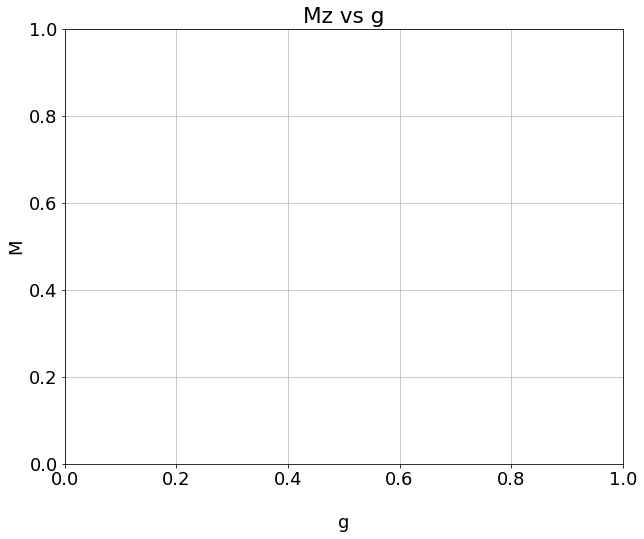

In [44]:
h_vector=np.linspace(0,0.05,29)+0.025
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(h_vector, chi_z[0],label='N=6',linestyle='--',marker='o')
plt.plot(h_vector, chi_z[1],label='N=8',linestyle='--',marker='o')
plt.plot(h_vector, chi_z[2],label='N=10',linestyle='--',marker='o')

plt.show()

### FIT PER H CRITICO DAFARE

In [45]:
h_vector

array([0.025     , 0.02678571, 0.02857143, 0.03035714, 0.03214286,
       0.03392857, 0.03571429, 0.0375    , 0.03928571, 0.04107143,
       0.04285714, 0.04464286, 0.04642857, 0.04821429, 0.05      ,
       0.05178571, 0.05357143, 0.05535714, 0.05714286, 0.05892857,
       0.06071429, 0.0625    , 0.06428571, 0.06607143, 0.06785714,
       0.06964286, 0.07142857, 0.07321429, 0.075     ])

In [46]:
H_t=h_vector-np.ones(len(h_vector))*0.025

NameError: name 'chi_z' is not defined

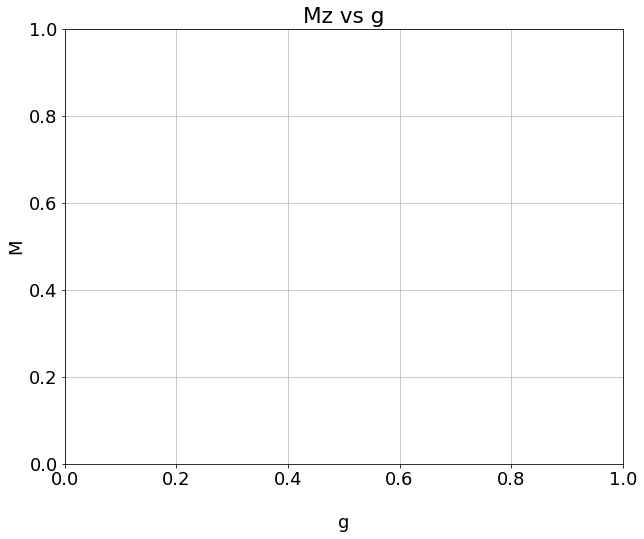

In [47]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (0,len(chi_z)):
    N=i*2+6.
    print((N**(beta*d/ni)))
    rescaled_h=(N**(beta*d/ni))*H_t
    mss=np.array(chi_z[i])
    print(mss)
    rescaled_chi=(N**(-gamma/ni))*mss
    plt.plot(rescaled_h, rescaled_chi,label='N=6',linestyle='--',marker='o')

plt.show()

In [ ]:
g_vector=np.linspace(0.5,1.2,30)
grounds=[]
for i in range (0,5):
    print(i)
    N=i*2+6
    grounds_i=[]
    delta_i=[]
    for j in range(0,len(g_vector)):
        A=Ham_operator(J,0,g_vector[j],N)
        grounds_i.append(eigsh(A,1),which='SA')
    grounds.append(grounds_i)

0
1
2


In [48]:
dg=(1.2-0.5)/30
M_Xs=[]
for i in range (0,5):
    m_Xs=[]
    N=i*2+6
    for j in range (0,len(g_vector)):
        gs=[]
        gs_0= np.array(grounds[i][j][1], dtype=np.float64)
        m_Xs.append(Magnetizzazione_x(gs_0,N))
    M_Xs.append(m_Xs)
chi_x=[]
for j in range (0,len(M_Xs)):
    chi=[]
    for i in range (0,len(M_Xs[j])-1):
        chi.append((M_Xs[j][i+1]-M_Xs[j][i])/dh)
    chi_x.append(chi)

IndexError: list index out of range

NameError: name 'chi_x' is not defined

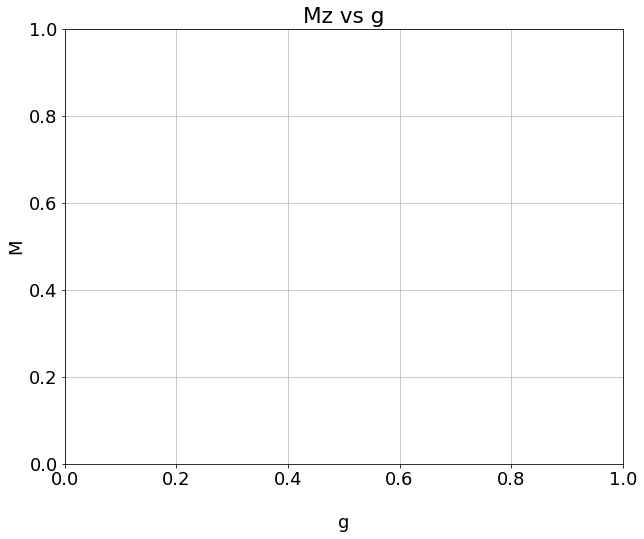

In [49]:
g_vector=np.linspace(0.5,1.2,29)+dg/2
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
plt.plot(g_vector, chi_x[0],label='N=6',linestyle='--',marker='o')
plt.plot(g_vector, chi_x[1],label='N=8',linestyle='--',marker='o')
plt.plot(g_vector, chi_x[2],label='N=10',linestyle='--',marker='o')

plt.show()

[ 9.03773761  9.28690745  9.55159586  9.82891082 10.11496613 10.40482198
 10.69247955 10.97094891 11.23240683 11.46845496 11.67047812 11.83008825
 11.93962339 11.99265607 11.98445606 11.91235083 11.77593614 11.57710793
 11.31991103 11.01022609 10.65533719 10.26343469  9.84311022  9.40289301
  8.9508635   8.49436384  8.03980984  7.59259682  7.15708433]
[ 8.40616888  8.59451737  8.80851334  9.04993552  9.31993495  9.61870936
  9.9451137  10.29622235 10.66687776 11.04928638 11.43275025 11.80364627
 12.14577089 12.44114228 12.67128363 12.81890257 12.86975378 12.81436837
 12.64930188 12.37762355 12.00853321 11.55619525 11.03805126 10.4729564
  9.87946427  9.27448799  8.6724375   8.08482081  7.52022283]
[ 8.19244017  8.33308585  8.49545966  8.6832375   8.90037215  9.150897
  9.43860127  9.76653496 10.13630305 10.54712529 10.99468004 11.46983046
 11.95745225 12.43572893 12.87639898 13.24643313 13.5113835  13.6401371
 13.61015418 13.41178722 13.0503122  12.54497411 11.92537637 11.22640012
 10.

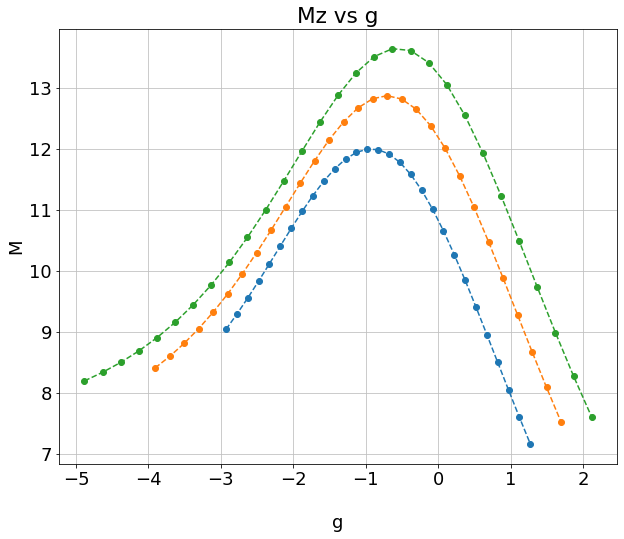

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (0,len(chi_x)):
    N=i*2+6
    rescaled_g=N**(1/ni)*(g_vector-np.ones(len(g_vector)))
    mss=np.array(chi_x[i])
    print(mss)
    rescaled_chi=(N**(-alpha/ni))*mss
    plt.plot(rescaled_g, rescaled_chi,label='N=6',linestyle='--',marker='o')

plt.show()

In [ ]:
def parabola(x, a, b, c):
    return a * x**2 + b * x + c

def k_max_and_fit(data, k):
    
    k_max_elements_with_index = [(data[i], i) for i in range(len(data))]
    k_max_elements_with_index.sort(reverse=True, key=lambda x: x[0])
    k_max_elements_with_index = k_max_elements_with_index[:k]
    
    # Estrarre le posizioni corrispondenti ai k elementi massimi
    x_data = np.array([g_vector[x[1]] for x in k_max_elements_with_index])
    y_data = np.array([x[0] for x in k_max_elements_with_index])
    
    # Fit i dati con un modello di parabola
    params, cov = curve_fit(parabola, x_data, y_data)
    
    # Calcolare gli errori sui parametri
    err = np.sqrt(np.diag(cov))
    
    # Calcolare il chi-quadrato
    residuals = y_data - parabola(x_data, *params)
    chisq = np.sum(residuals**2)
    
    beta=-params[1]/(2*params[0])
    max=parabola(beta,*params)
    return beta,max


In [50]:
def beta_and_max(start,stop,data):
    betas_maxs=[]
    betas=[]
    maxs=[]
    for i in range (start,stop):
        betas_maxs.append(k_max_and_fit(data,i))
    for values in betas_maxs:
        betas.append(values[0])
        maxs.append(values[1])
    beta=mean(betas)
    max=mean(maxs)
    d_beta=stdev(betas)
    d_max=stdev(maxs)
    return beta,d_beta,max,d_max

In [51]:
betas=[]
dbetas=[]
xmaxs=[]
dxmaxs=[]
for i in range (0, len(chi_x)):
    g,dg,xm,dxm=beta_and_max(3,8,chi_x[i])
    betas.append(g)
    dbetas.append(dg)
    xmaxs.append(xm)
    dxmaxs.append(dxm)


NameError: name 'chi_x' is not defined

In [52]:
xmaxs

[]

In [53]:
Ns=[6,8,10]

In [54]:
def scaling_x(x, a,  c):
    return a * np.log(x) + c
params, cov = curve_fit(scaling_x,Ns,xmaxs)

# Calcolare gli errori sui parametri
errors = np.sqrt(np.diag(cov))

# Calcolare il chi-quadrato
residuals = np.array(deltas) - scaling_x(np.array(deltas), *params)
chisq = ((residuals)**2).sum()

print(chisq)
print(params)
print(errors)

ValueError: `ydata` must not be empty!

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

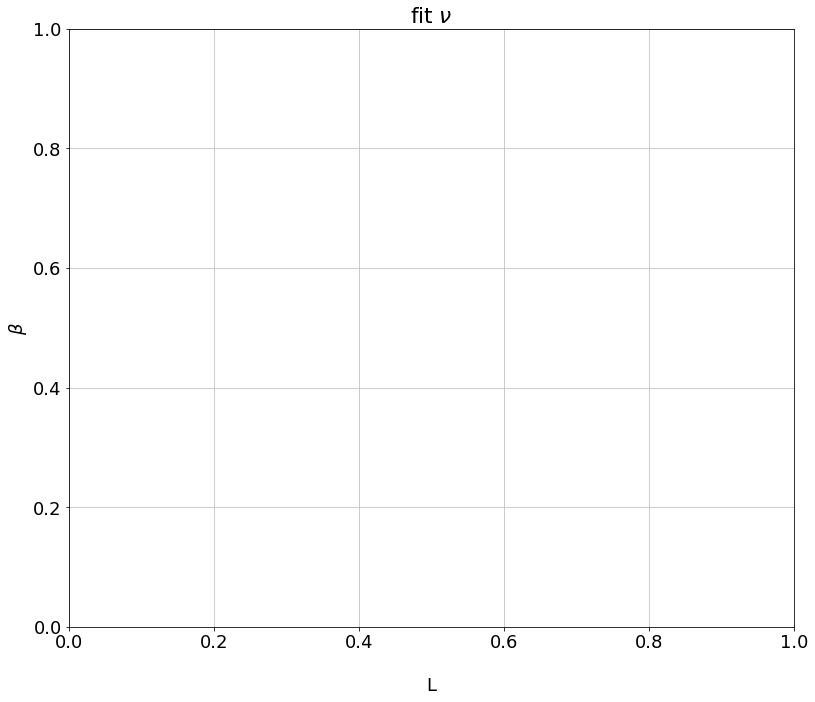

In [55]:
n=np.linspace(min(Ns),max(Ns)+1,10000)
plt.figure(figsize=(13, 11))
plt.title(r'fit $\nu$')
plt.rc('font', size = 15)
plt.xlabel('L', labelpad = 25)
plt.ylabel(r'$\beta$')
plt.grid(color = 'silver')
plt.plot(Ns, xmaxs, linestyle = '', color = 'black', marker = '.')
plt.plot(n, scaling_x(n,*params), color = 'blue', label = 'retta di fit')

plt.show()

[ 9.03773761  9.28690745  9.55159586  9.82891082 10.11496613 10.40482198
 10.69247955 10.97094891 11.23240683 11.46845496 11.67047812 11.83008825
 11.93962339 11.99265607 11.98445606 11.91235083 11.77593614 11.57710793
 11.31991103 11.01022609 10.65533719 10.26343469  9.84311022  9.40289301
  8.9508635   8.49436384  8.03980984  7.59259682  7.15708433]
[ 8.40616888  8.59451737  8.80851334  9.04993552  9.31993495  9.61870936
  9.9451137  10.29622235 10.66687776 11.04928638 11.43275025 11.80364627
 12.14577089 12.44114228 12.67128363 12.81890257 12.86975378 12.81436837
 12.64930188 12.37762355 12.00853321 11.55619525 11.03805126 10.4729564
  9.87946427  9.27448799  8.6724375   8.08482081  7.52022283]
[ 8.19244017  8.33308585  8.49545966  8.6832375   8.90037215  9.150897
  9.43860127  9.76653496 10.13630305 10.54712529 10.99468004 11.46983046
 11.95745225 12.43572893 12.87639898 13.24643313 13.5113835  13.6401371
 13.61015418 13.41178722 13.0503122  12.54497411 11.92537637 11.22640012
 10.

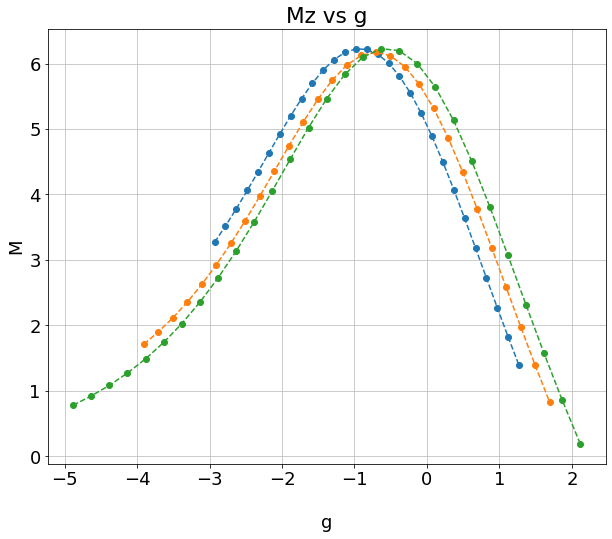

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Mz vs g')
plt.rc('font', size = 18)
plt.xlim()
plt.ylim()
plt.xlabel('g', labelpad = 25)
plt.ylabel('M')
plt.grid(color = 'silver')
for i in range (0,len(chi_x)):
    N=i*2+6
    rescaled_g=N**(1/ni)*(g_vector-np.ones(len(g_vector)))
    mss=np.array(chi_x[i])
    print(mss)
    rescaled_chi=(N**(-alpha/ni))*(mss-params[0]*np.log(N))
    plt.plot(rescaled_g, rescaled_chi,label='N=6',linestyle='--',marker='o')